<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_DeepLearning_Teorema_da_Aproxima%C3%A7%C3%A3o_Universal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Teorema da Aproximação Universal</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1ypA177FrfPZjkOXf9TaNPQ8SpNYxX1LT>Arquivo Colab</a></font><!--- Para indicar o arquivo a ser trabalhado a partir do Github, sem ter que criar uma nova cópias --->


<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/extra/alura-mais/redes-neurais-por-que-sao-tao-poderosas--c317><font size=2 color=gray>Aula Alura - Redes Neurais: Por que são tão poderosas?</a>
<li>Instrutora: Camila Laranjeira
<li>Data de Início: 02-09-2022
</ul>

<hr color=gray><br>



In [1]:
import torch
from torch import nn  # neural network
from torch import optim

import numpy as np
import matplotlib.pyplot as plt

## Construindo neurônios simples

In [2]:
# 
mlp = nn.Sequential(
      nn.Linear(1, 2),
      nn.Sigmoid(),
)

mlp[0].weight = nn.Parameter(torch.Tensor( [[1000], [-1000]] ))
mlp[0].bias   = nn.Parameter(torch.Tensor( [-300, 400] ))

for name, param in mlp.named_parameters():
  print(name, param)

0.weight Parameter containing:
tensor([[ 1000.],
        [-1000.]], requires_grad=True)
0.bias Parameter containing:
tensor([-300.,  400.], requires_grad=True)


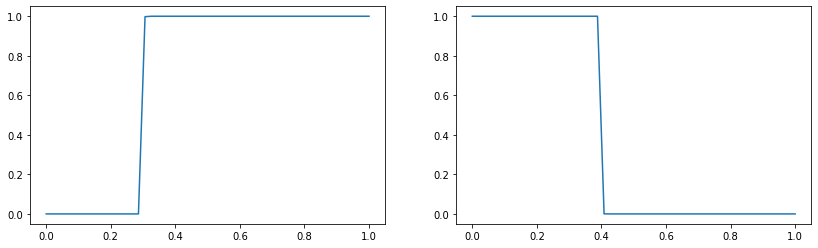

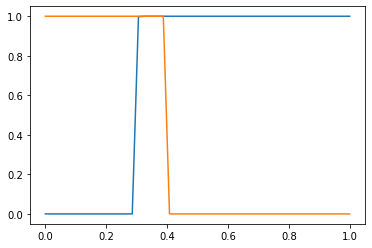

In [ ]:
def forward(x, mlp):
  
  entrada = torch.tensor(x).unsqueeze(1) 
  saida = mlp(entrada).detach().numpy()
  return saida

x = np.linspace(0, 1, 50).astype(np.float32)
saida = forward(x, mlp)
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(x, saida[:, 0] )
axs[1].plot(x, saida[:, 1] )

plt.figure()
plt.plot(x, saida[:, 0] )
plt.plot(x, saida[:, 1] )

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


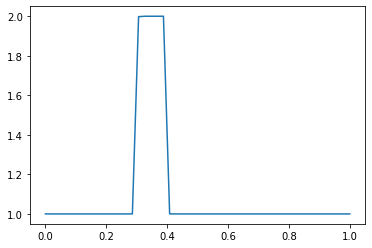

In [ ]:
mlp.linear = nn.Linear(2, 1)
print(mlp)

mlp.linear.weight = nn.Parameter(torch.Tensor( [[1, 1]] ))
mlp.linear.bias   = nn.Parameter(torch.Tensor( [0] ))

saida = forward(x, mlp)
plt.plot(x, saida[:, 0] )
plt.show()

### Teorema de Aproximação Universal de Redes Neurais

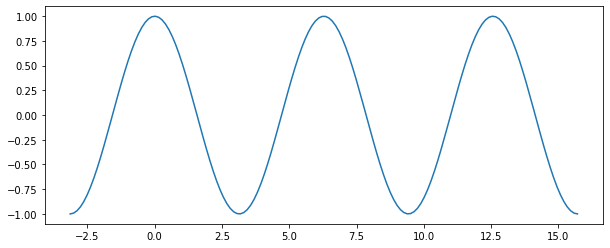

In [ ]:
X_npy = np.linspace(-np.pi, 5*np.pi, 150)
y_npy = np.cos(X_npy)  

plt.figure(figsize=(10, 4))
plt.plot(X_npy, y_npy)

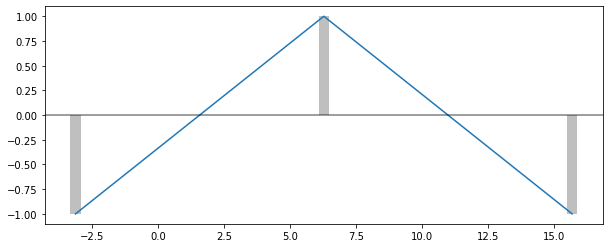

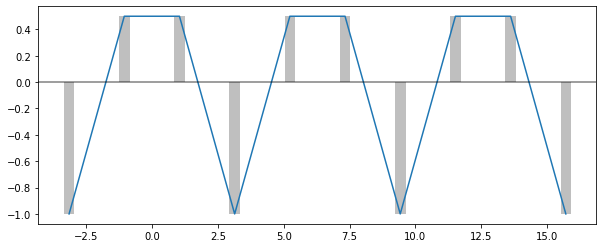

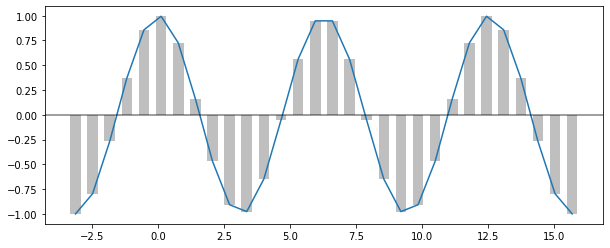

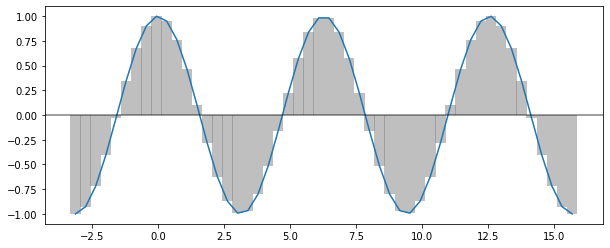

In [ ]:
for n in [5, 10, 30, 50]:
  X_npy = np.linspace(-np.pi, 5*np.pi, n)
  y_npy = np.cos(X_npy)  

  plt.figure(figsize=(10, 4))
  plt.plot(X_npy, y_npy) 

  X_bar = np.linspace(-np.pi, 5*np.pi, n)
  y_bar = np.cos(X_bar)  
  plt.bar(X_bar, y_bar, color='gray', alpha=0.5, width=0.4)
  plt.axhline(0, -1, 1, color='k', alpha=0.5)

## Incrementando o número de neurônios na camada escondida

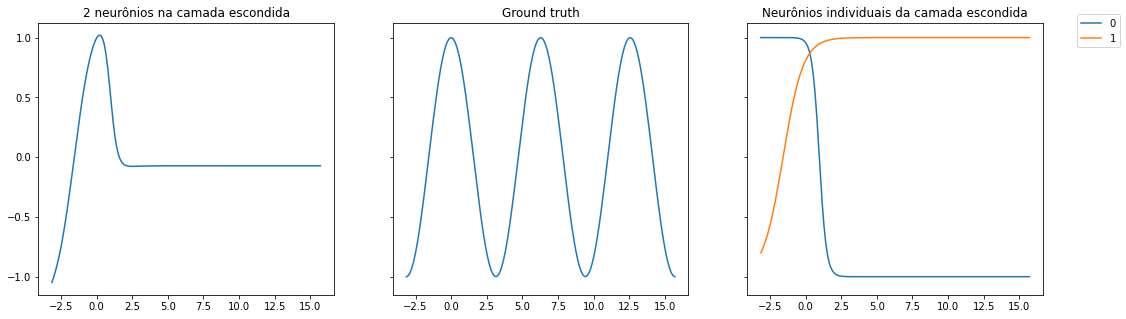

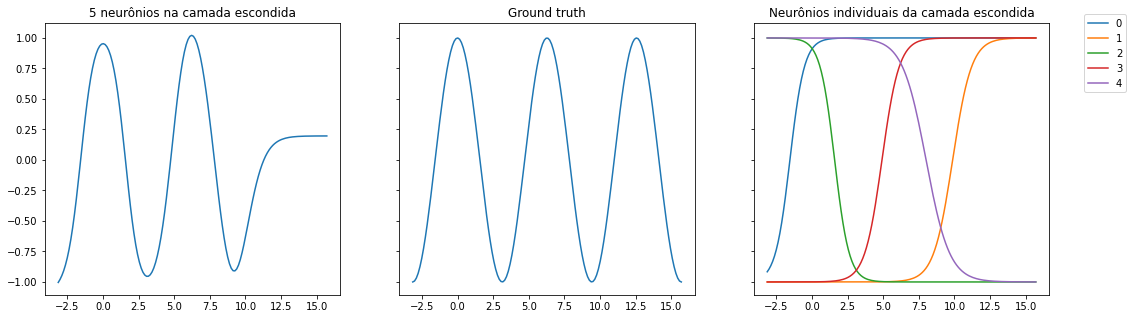

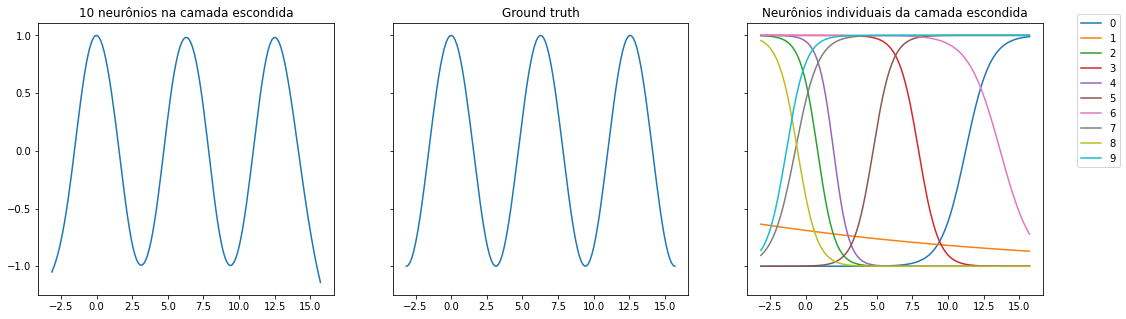

In [ ]:
X_npy = np.linspace(-np.pi, 5*np.pi, 150)
y_npy = np.cos(X_npy)  

X = torch.FloatTensor(X_npy).unsqueeze(1).to(torch.device('cuda'))
y = torch.FloatTensor(y_npy).to(torch.device('cuda'))

torch.manual_seed(42)

for n in [2, 5, 10]:

  mlp = nn.Sequential()
  mlp.feature = nn.Sequential( 
                  nn.Linear(1, n),
                  nn.Tanh(),
              )
  
  # Force a última camada a fazer uma simples soma de suas entradas
  # para que as funções intermediárias reflitam diretamente
  # o padrão que estamos buscando
  mlp.linear = nn.Linear(n,1)
  mlp.linear.weight = nn.Parameter(torch.FloatTensor( [[1] * n]  ))
  mlp.linear.bias   = nn.Parameter(torch.FloatTensor( [0] ))
  mlp.linear.requires_grad = False

  mlp.to(torch.device('cuda'))

  criterion = nn.MSELoss().to(torch.device('cuda'))
  optimizer = optim.Adam(mlp.parameters(), lr=1e-2)

  for i in range(4000):
    saida = mlp(X) 
    loss = criterion(saida, y.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  
  saida = mlp(X)

  fig, axs = plt.subplots(1,3, figsize=(18, 5), sharey=True)
  axs[0].plot(X[:,0].detach().cpu().numpy(), saida[:, 0].detach().cpu().numpy() )
  axs[0].set_title('{0} neurônios na camada escondida'.format(n))
  axs[1].plot(X[:,0].detach().cpu().numpy(), y.detach().cpu().numpy() )
  axs[1].set_title('Ground truth')

  feature = mlp.feature(X)
  for dim in range(feature.shape[1]):
    axs[2].plot(X[:,0].detach().cpu().numpy(), feature[:, dim].detach().cpu().numpy() , label=str(dim))
  axs[2].set_title('Neurônios individuais da camada escondida')
  axs[2].legend(bbox_to_anchor=(1.1, 1.05))


  
  plt.show()


